Calibration Factor (encoder steps per mm): 27.33473242392445


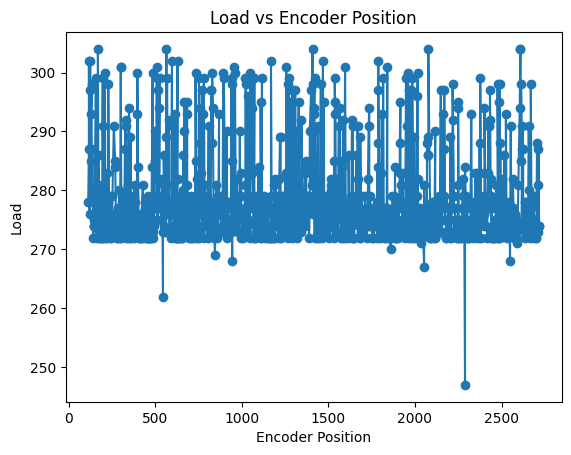

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the text file
with open('encoderCalibration.txt', 'r') as file:
    data = file.readlines()

# Parse the data to extract load and position values
loads = []
positions = []

for line in data:
    parts = line.strip().split(' ')
    load = int(parts[1])
    position = float(parts[3])
    loads.append(load)
    positions.append(position)

# Assuming we know the physical distance for top and bottom positions
# For example, let's say the total distance moved from top to bottom is 50mm

# Top position encoder reading (e.g., the first position value)
top_position_encoder = positions[0]

# Bottom position encoder reading (e.g., the last position value)
bottom_position_encoder = positions[-1]

# Known physical distance (in mm) between the top and bottom positions
known_distance_mm = 95.3

# Calculate the calibration factor (encoder steps per mm)
calibration_factor = (top_position_encoder - bottom_position_encoder) / known_distance_mm

print(f"Calibration Factor (encoder steps per mm): {calibration_factor}")

# Optionally, plot the data to visualize the relationship
plt.plot(positions, loads, 'o-')
plt.xlabel('Encoder Position')
plt.ylabel('Load')
plt.title('Load vs Encoder Position')
plt.show()


Calibration Factor (encoder steps per mm): 27.33473242392445


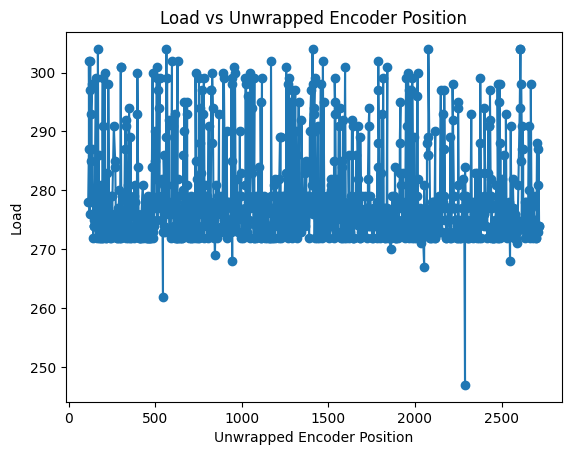

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the text file
with open('encoderCalibration.txt', 'r') as file:
    data = file.readlines()

# Parse the data to extract load and position values
loads = []
positions = []

for line in data:
    parts = line.strip().split(' ')
    load = int(parts[1])
    position = float(parts[3])
    loads.append(load)
    positions.append(position)

# Unwrap the encoder positions
unwrapped_positions = []
previous_position = positions[0]
total_rotation = 0
max_encoder_value = 4096  # Maximum value for the 12-bit encoder

for position in positions:
    # Check for wrap-around
    if position < 0.1 * max_encoder_value and previous_position > 0.9 * max_encoder_value:
        total_rotation += 1
    elif position > 0.9 * max_encoder_value and previous_position < 0.1 * max_encoder_value:
        total_rotation -= 1
    
    # Calculate unwrapped position
    unwrapped_position = position + total_rotation * max_encoder_value
    unwrapped_positions.append(unwrapped_position)
    
    previous_position = position

# Assuming we know the physical distance for top and bottom positions
# For example, let's say the total distance moved from top to bottom is 50mm

# Top position encoder reading (e.g., the first unwrapped position value)
top_position_encoder = unwrapped_positions[0]

# Bottom position encoder reading (e.g., the last unwrapped position value)
bottom_position_encoder = unwrapped_positions[-1]

# Known physical distance (in mm) between the top and bottom positions
known_distance_mm = 95.3

# Calculate the calibration factor (encoder steps per mm)
calibration_factor = (top_position_encoder - bottom_position_encoder) / known_distance_mm

print(f"Calibration Factor (encoder steps per mm): {calibration_factor}")

# Optionally, plot the data to visualize the relationship
plt.plot(unwrapped_positions, loads, 'o-')
plt.xlabel('Unwrapped Encoder Position')
plt.ylabel('Load')
plt.title('Load vs Unwrapped Encoder Position')
plt.show()
